In [94]:
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [95]:
table_data = pd.read_csv("StudentsPerformance.csv")
table_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [96]:
# remove extra spaces from start and end, if there is any spaces in middle convert them into underscore
table_data.columns = [col.strip().replace(" ", "_").lower() for col in table_data.columns]

# if there is multiple spaces inside then those spaces converted into multiple underscore, so using re library and changing multiple spaces into single
table_data.columns = [re.sub(r'_+', '_', col) for col in table_data.columns]

print("Filtered column names : ", table_data.columns)

Filtered column names :  Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [97]:
# creating a new col of total_score and avg_score for better evaluation
table_data['total_score'] = table_data[['math_score', 'reading_score', 'writing_score']].sum(axis=1)
table_data['average_score'] = table_data[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

In [98]:
# Trying to encode the possibilities of each column if they have
mappings = {
    'gender': {'female': 0, 'male': 1},
    'lunch': {'free/reduced': 0, 'standard': 1},
    'test_preparation_course': {'none': 0, 'completed': 1}
}

In [99]:
# Applying that mapping to our original data to encode it, so that I will use this data
for column, mapping in mappings.items():
    if column in table_data.columns:
        table_data[column] = table_data[column].map(mapping)

# Saving the newly made data file as csv file, and not including the row numbers
table_data.to_csv("FileteredTableFile.csv", index=False)
print("Dataset saved")


Dataset saved


In [106]:
from sklearn.model_selection import train_test_split

# defining x and y for testing and training
X = table_data.drop(['average_score', 'total_score'], axis=1) 
y = table_data['average_score']  

x_training_data,
x_test_data, y_training_data, 
y_test_data = train_test_split(X , y ,
test_size = 0.2 , random_state = 42)


In [101]:
# for col, mapping in mappings.items():
#     if col in X_train.columns:
#         X_train[col] = X_train[col].map(mapping)
#         X_test[col] = X_test[col].map(mapping)

x_training_data = pd.get_dummies(x_training_data, drop_first=True)
x_test_data = pd.get_dummies(x_test_data, drop_first=True)

# filling nana vakues if exist
x_test_data = x_test_data.reindex(columns=x_training_data.columns, fill_value=0)
x_training_data = x_training_data.fillna(0) 
x_test_data = x_test_data.fillna(0)

scale_to_increase = MinMaxScaler()
X_training_scaled = scale_to_increase.fit_transform(x_training_data)
X_testing_scaled = scale_to_increase.transform(x_test_data)


In [102]:
# converting scale data into float type
X_train_tensorflow = X_training_scaled.astype('float32')
X_test_tensorflow = X_testing_scaled.astype('float32')
y_train_tensoreflow = y_training_data.astype('float32')
y_test_tensorflow = y_test_data.astype('float32')

# making nerual network for filtering
model_tf = Sequential([
    Input(shape=(X_train_tensorflow.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])


In [103]:
# making it for tensor flow to use
X_train_tensorflow = x_training_data.astype('float32')

X_test_tensorflow =  x_test_data.astype('float32')
y_train_tensoreflow  = y_training_data.astype('float32')
y_test_tensorflow = y_test_data.astype('float32')


In [104]:

model_tf=  Sequential([
    Input(shape=(X_train_tensorflow.shape[1],)),Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model_tf.compile( optimizer= Adam(learning_rate=0.001) ,  loss='mse', metrics=['mse'])

In [105]:
# running for training
history_tf=  model_tf.fit(X_train_tensorflow ,   y_train_tensoreflow, validation_split=0.2, epochs=100 , batch_size=16, verbose=1)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 882.3356 - mse: 882.3356 - val_loss: 9.4052 - val_mse: 9.4052
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.6470 - mse: 11.6470 - val_loss: 2.9856 - val_mse: 2.9856
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2602 - mse: 2.2602 - val_loss: 0.9431 - val_mse: 0.9431
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0836 - mse: 1.0836 - val_loss: 0.6468 - val_mse: 0.6468
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7006 - mse: 0.7006 - val_loss: 0.5172 - val_mse: 0.5172
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5605 - mse: 0.5605 - val_loss: 0.3532 - val_mse: 0.3532
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4083 - mse: 0.4083 - val_loss: 0.3115 - val_mse: 0.3115
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3654 - mse: 0.3654 - val_loss: 0.2631 - val_mse: 0.2631
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - los

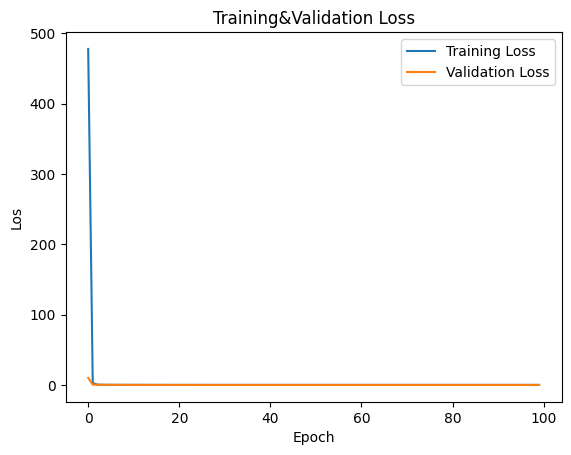

In [92]:
plt.plot(history_tf.history['loss'], label='Training Loss')
plt.plot(history_tf.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Los')
plt.legend()
plt.title('Training&Validation Loss')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


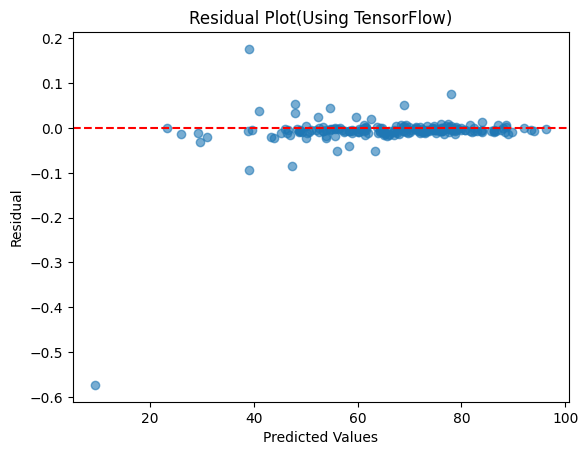

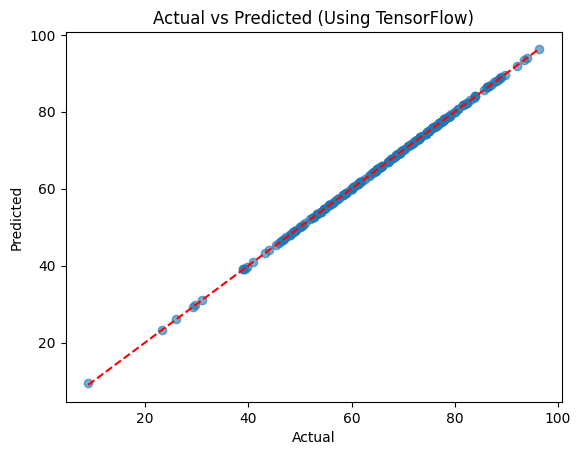

In [ ]:

y_pred_tf = model_tf.predict(X_test_tensorflow)
residuals_tf = y_test_tensorflow  - y_pred_tf.flatten()
plt.scatter(y_pred_tf , residuals_tf, alpha=0.6)


plt.axhline( 0, color='red', linestyle='--')

plt.xlabel('Predicted Values')

plt.ylabel('Residual')
plt.title('Residual Plot(Using TensorFlow)')

plt.show()

plt.scatter(y_test_tensorflow, y_pred_tf, alpha=0.6)

plt.plot([y_test_tensorflow.min(), y_test_tensorflow.max()], [y_test_tensorflow.min(), y_test_tensorflow.max()], color='red', linestyle='--')
plt.xlabel('Actual')

plt.ylabel('Predicted')

plt.title('Actual vs Predicted (Using TensorFlow)')

plt.show()